## Social Media Analytics Assignment #1
### Juhi Patel, AIshwarya Rajeev, Carlee Allen, Aarib Mohamed

### Part I: Finding predictors of influence

In [1]:
# import python libraries 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_o = pd.read_csv('/content/train.csv.zip') 
test_o = pd.read_csv('/content/test.csv.zip') 

In [3]:
train_o

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,41765,185,1356,1529.643058,282.858500,76.809514,5.392171,104.438625,3307,...,1370,15143,6881.482996,5013.642295,22.683131,2.385538,18.420981,23958,21.324988,1413.825398
5496,1,112,243,5,1.445174,0.100503,0.100503,0.100503,0.603177,5,...,479,8,0.306073,0.306073,0.100503,0.100503,1.621981,1,49.000000,4969.000000
5497,0,15385,673,747,55.993546,22.321945,6.946233,0.341936,6.503977,202,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5498,0,265258,209,551,631.915946,457.648550,5.460985,0.100503,7.498126,2603,...,37601,22232,176.533716,42.330221,6.849227,1.345073,4.359865,696,234.338068,7168.464489


In [4]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
train = pd.DataFrame(MinMaxScaler().fit_transform(train_o), columns=train_o.columns)
test = pd.DataFrame(MinMaxScaler().fit_transform(test_o), columns=test_o.columns)

In [5]:
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0.0,5.801356e-06,0.000259,0.000005,4.221691e-07,0.000000e+00,0.000000,0.000000,0.001356,0.000002,...,0.044870,0.003076,1.338608e-05,8.910729e-06,0.105644,0.014325,0.035696,0.000072,0.040573,0.025381
1,0.0,5.903975e-04,0.001011,0.000415,7.889846e-05,5.896344e-05,0.073118,0.062425,0.026305,0.000401,...,0.001276,0.002932,3.527231e-05,2.029046e-05,0.040767,0.028650,0.005026,0.000177,0.070924,0.038815
2,0.0,1.995995e-04,0.001042,0.000184,2.218191e-05,2.169639e-05,0.068584,0.030309,0.018081,0.000103,...,0.000726,0.000375,5.537738e-07,5.825161e-07,0.006553,0.000000,0.002605,0.000003,0.005551,0.003672
3,0.0,1.094596e-07,0.000006,0.000004,6.627834e-06,4.056719e-07,0.016048,0.000000,0.014148,0.000007,...,0.026549,0.000506,5.001440e-04,8.952962e-04,0.357866,0.436506,0.165835,0.001913,0.012607,0.018482
4,1.0,1.247100e-03,0.000739,0.004809,1.298911e-04,8.466314e-05,0.362164,0.199690,0.123131,0.000598,...,0.002576,0.000330,1.877489e-05,7.987499e-06,0.086876,0.062954,0.023126,0.000092,0.026053,0.026397


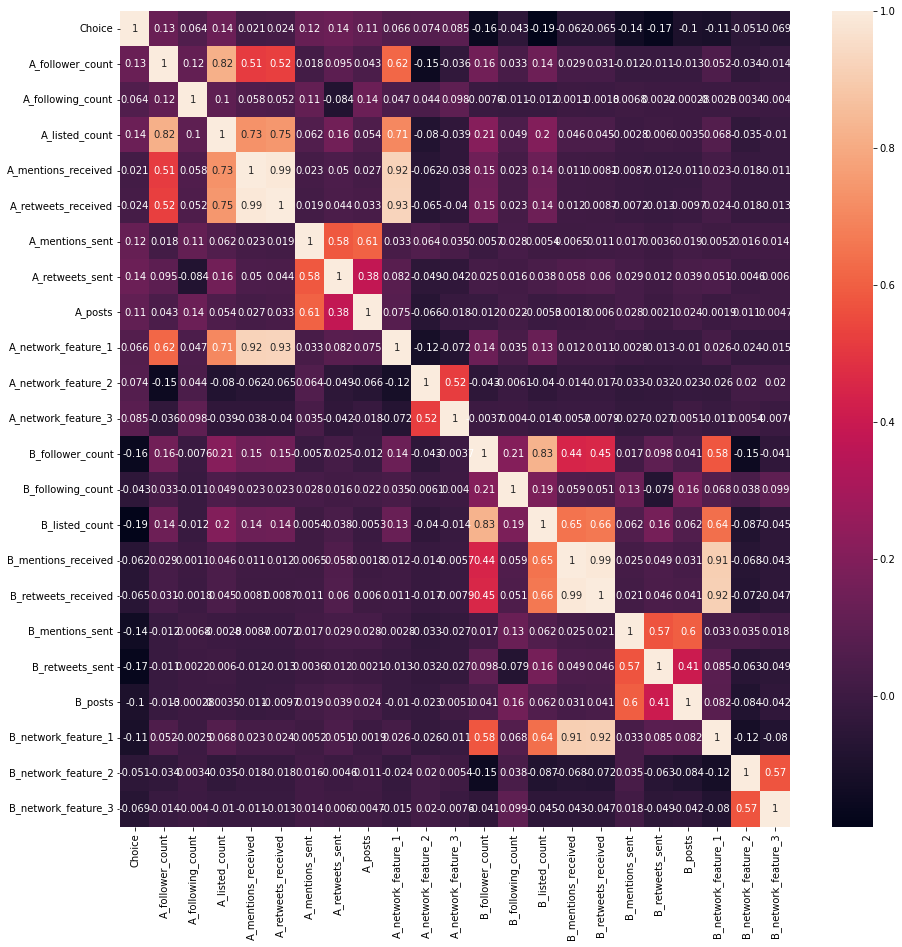

In [6]:
#Heat map
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the correlation matrix
corr_matrix = train.corr()

# Plot the correlation matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, ax=ax)

plt.show()


# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find the index of the feature columns with a correlation greater than a threshold (e.g., 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the highly correlated features
train = train.drop(train[to_drop], axis=1)


In [7]:
to_drop

['A_retweets_received',
 'A_network_feature_1',
 'B_retweets_received',
 'B_network_feature_1']

In [8]:
ytrain = train['Choice']
X = train.drop(['Choice'], axis=1)

<ipython-input-6-aaa5532bb07d>:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [9]:
x_train = pd.DataFrame()

In [10]:
#A-B Key attributes

x_train['follower_diff'] = X['A_follower_count'] - X['B_follower_count']
x_train['following_diff'] = X['A_following_count'] - X['B_following_count']
x_train['listed_diff'] = X['A_listed_count'] - X['B_listed_count']
x_train['mentionsreceived_diff'] = X['A_mentions_received'] - X['B_mentions_received']
#x_train['retweetsreceived_diff'] = X['A_retweets_received'] - X['B_retweets_received']
x_train['mentionssent_diff'] = X['A_mentions_sent'] - X['B_mentions_sent']
x_train['retweetssent_diff'] = X['A_retweets_sent'] - X['B_retweets_sent']
x_train['posts_diff'] = X['A_posts'] - X['B_posts']
#x_train['network1_diff'] = X['A_network_feature_1'] - X['B_network_feature_1']
x_train['network2_diff'] = X['A_network_feature_2'] - X['B_network_feature_2']
x_train['network3_diff'] = X['A_network_feature_3'] - X['B_network_feature_3']

In [11]:
#A/B Key attributes

x_train['follower_div'] = X['A_follower_count'] / X['B_follower_count']
x_train['following_div'] = X['A_following_count'] / X['B_following_count']
x_train['listed_div'] = X['A_listed_count'] / X['B_listed_count']
x_train['mentionsreceived_div'] = X['A_mentions_received'] / X['B_mentions_received']
#x_train['retweetsreceived_div'] = X['A_retweets_received'] / X['B_retweets_received']
x_train['mentionssent_div'] = X['A_mentions_sent'] / X['B_mentions_sent']
x_train['retweetssent_div'] = X['A_retweets_sent'] / X['B_retweets_sent']
x_train['posts_div'] = X['A_posts'] / X['B_posts']
#x_train['network1_div'] = X['A_network_feature_1'] / X['B_network_feature_1']
x_train['network2_div'] = X['A_network_feature_2'] / X['B_network_feature_2']
x_train['network3_div'] = X['A_network_feature_3'] / X['B_network_feature_3']

In [12]:
#replace null values with mean
x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_train['follower_div'].fillna(value=x_train['follower_div'].mean(), inplace=True)
x_train['network2_diff'].fillna(value=x_train['network2_diff'].mean(), inplace=True)
x_train['network3_diff'].fillna(value=x_train['network3_diff'].mean(), inplace=True)
x_train['mentionsreceived_div'].fillna(value=x_train['mentionsreceived_div'].mean(), inplace=True)
x_train['network2_div'].fillna(value=x_train['network2_div'].mean(), inplace=True)
x_train['network3_div'].fillna(value=x_train['network3_div'].mean(), inplace=True)
x_train['following_div'].fillna(value=x_train['network2_div'].mean(), inplace=True)
x_train['listed_div'].fillna(value=x_train['network3_div'].mean(), inplace=True)
x_train['mentionssent_div'].fillna(value=x_train['mentionssent_div'].mean(), inplace=True)
x_train['retweetssent_div'].fillna(value=x_train['retweetssent_div'].mean(), inplace=True)
x_train['posts_div'].fillna(value=x_train['posts_div'].mean(), inplace=True)


In [13]:
pd.set_option('display.max_columns', None)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#x_reduced = x_train[['listed_div','retweetssent_diff','mentionssent_div','posts_div','network2_div','network3_div']].copy()

#Normal set of features
X_train, X_test, y_train, y_test = train_test_split(x_train, ytrain, test_size=0.33, random_state=42)

reg = LogisticRegression(random_state=4,max_iter=10000).fit(X_train, y_train)
y_pred = reg.predict(X_test)


print("Training Accuracy :", reg.score(X_train, y_train))
print("Testing Accuracy :", reg.score(X_test, y_test))

print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

Training Accuracy : 0.6971506105834464
Testing Accuracy : 0.6914600550964187
Confusion matrix: 
[[699 197]
 [363 556]]


In [15]:
# Determine the important predictors of influence
coefs = reg.coef_[0]
coefs_with_names = sorted(list(zip(x_train.columns, coefs)), key=lambda x: abs(x[1]), reverse=True)

# Print the predictors and their coefficients
for predictor, coef in coefs_with_names:
    print(f"{predictor}: {coef}")

retweetssent_diff: 1.945426198183953
follower_diff: 1.4135032041376032
mentionssent_diff: 1.1959706468294042
listed_diff: 0.8390946373870022
network2_diff: 0.6222674618018517
posts_diff: 0.6146980723826035
network3_diff: 0.4180382633331989
following_diff: 0.2504493824066915
mentionsreceived_diff: 0.17506934309839497
network3_div: 0.024704830899992616
retweetssent_div: -0.013755476486460616
mentionssent_div: 0.009325700903913612
listed_div: 0.002987851968732211
posts_div: 0.0029733503544753276
network2_div: 0.0007572462158145362
follower_div: 0.00037076138490220873
following_div: 0.0001295925752750722
mentionsreceived_div: -3.45881877919811e-06


In [16]:
#Feature selection
!pip install statsmodels --upgrade
import statsmodels.api as sm
cols = ['retweetssent_diff','follower_diff','mentionssent_diff','mentionsreceived_div','listed_diff']
x_train2=X_train[cols]
x_test2=X_test[cols]

logit_model=sm.Logit(y_train,x_train2)
result=logit_model.fit()
print(result.summary2())
cols

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Optimization terminated successfully.
         Current function value: 0.588224
         Iterations 7
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.151      
Dependent Variable:   Choice           AIC:              4345.2132  
Date:                 2023-02-07 05:28 BIC:              4376.2733  
No. Observations:     3685             Log-Likelihood:   -2167.6    
Df Model:             4                LL-Null:          -2553.4    
Df Residuals:         3680             LLR p-value:      1.1432e-165
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------

['retweetssent_diff',
 'follower_diff',
 'mentionssent_diff',
 'mentionsreceived_div',
 'listed_diff']

In [17]:
features_selected = ['retweetssent_diff','follower_diff','mentionssent_diff','listed_diff' ]
coefficients = [1.945426198183953, 1.4135032041376032,1.1959706468294042, 0.8390946373870022  ] 
var_coefficients = pd.Series(coefficients, index = features_selected)

In [18]:
clf = LogisticRegression()
clf.fit(x_train2,y_train)
y_pred = clf.predict(x_test2)

print("Training Accuracy :", clf.score(x_train2, y_train))
print("Testing Accuracy :", clf.score(x_test2, y_test))
print("Confusion matrix: \n")
confusion_matrix(y_test, y_pred)

Training Accuracy : 0.669742198100407
Testing Accuracy : 0.6589531680440771
Confusion matrix: 



array([[537, 359],
       [260, 659]])

In [19]:
# random forest

from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier()
model_random.fit(X_train, y_train)

y_pred = model_random.predict(X_test)

print("Training Accuracy :", model_random.score(X_train, y_train))
print("Testing Accuracy :", model_random.score(X_test, y_test))

confusion_matrix(y_test, y_pred)

Training Accuracy : 0.9940298507462687
Testing Accuracy : 0.7674931129476584


array([[671, 225],
       [197, 722]])

In [20]:
feature_importances = pd.DataFrame(model_random.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
 
feature_importances.head(6)

,importance
listed_div,0.143641
listed_diff,0.110617
follower_div,0.096471
mentionsreceived_div,0.091414
mentionsreceived_diff,0.069367
follower_diff,0.068046


In [21]:
# select features with importance score larger than 0.05

cols = ['listed_div','listed_diff','follower_div','follower_diff','mentionsreceived_div','mentionsreceived_diff']
x_train3 = X_train[cols]
x_test3 = X_test[cols]

model_random = RandomForestClassifier()
model_random.fit(x_train3, y_train)

y_pred = model_random.predict(x_test3)

print("Training Accuracy :", model_random.score(x_train3, y_train))
print("Testing Accuracy :", model_random.score(x_test3, y_test))

confusion_matrix(y_test, y_pred)

Training Accuracy : 0.9940298507462687
Testing Accuracy : 0.7454545454545455


array([[662, 234],
       [228, 691]])

**The factors listed in the "cols" variable, 'listed_div', 'listed_diff', 'follower_div', 'follower_diff', 'mentionsreceived_div', and 'mentionsreceived_diff', are the best predictors of influence according to the logistic regression model**. These features likely represent various aspects of a user's presence and activity on Twitter, such as the number of users they follow, the number of users following them, and the number of mentions they receive.

A business could use the results of logistic regression model to identify the key factors that influence a user's presence and activity on Twitter, and use that information to target their marketing efforts to the most influential users. For example, they could use the features to analyze the Twitter presence of beauty influencers and determine which influencers are likely to have the most impact on their target audience. This information could then be used to inform their marketing and outreach strategies.


Training Accuracy : 0.7997286295793758
Testing Accuracy : 0.7713498622589532
Roc Auc score : 0.7712782236126224
Confusion Matrix: 
 [[686 210]
 [205 714]]


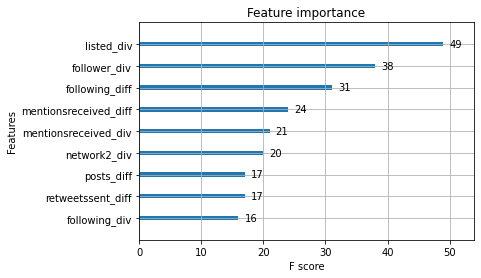

In [22]:
# XGBoost
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance

neg = len(y_train)-sum(y_train==1)
pos = sum(y_train==1)

model_xg = XGBClassifier(max_depth=2, objective='binary:logistic',scale_pos_weight=neg/pos)
model_xg.fit(X_train, y_train)
y_pred=model_xg.predict(X_test)

print("Training Accuracy :", model_xg.score(X_train, y_train))
print("Testing Accuracy :", model_xg.score(X_test, y_test))
print("Roc Auc score :",roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))


plot_importance(model_xg, max_num_features=9)
plt.show()

In [23]:
#Financial model
x_train['predicted'] = reg.predict(x_train)

#merge with original train set
train_set = train_o[['Choice','A_follower_count','B_follower_count']].merge(x_train, left_index=True, right_index=True)


In [24]:
#non analytics
train_set['noanalyticsprofit'] = train_set['A_follower_count'] * 0.0001 * 10 - 5 + train_set['B_follower_count'] * 0.0001 * 10 - 5

train_set['noanalyticsprofit'].sum()


7289539.46

In [25]:
#analytics
train_set['analyticsprofit'] = np.where((train_set['predicted'] == 1), 
                           train_set['A_follower_count'] * 0.00015 * 10 - 10,     
                           train_set['B_follower_count'] * 0.00015 * 10 - 10)  
train_set['analyticsprofit'].sum()

8088219.904999999

In [26]:
#Lift in Expected Profit - Our Analytics model

train_set['analyticsprofit'].sum() - train_set['noanalyticsprofit'].sum()

798680.4449999994

In [27]:
#Perfect analytical model

train_set['perfect_analyticsprofit'] = np.where((train_set['Choice'] == 1), 
                           train_set['A_follower_count'] * 0.00015 * 10 - 10,     
                           train_set['B_follower_count'] * 0.00015 * 10 - 10)  
train_set['perfect_analyticsprofit'].sum()


8009852.8895

In [28]:
#Lift in Expected Profit - Perfect Analytics model
train_set['perfect_analyticsprofit'].sum() - train_set['noanalyticsprofit'].sum()

720313.4294999996

### Part II: Finding influencers from Twitter 


In [29]:
!pip install tweepy
import tweepy as tw
import re



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
def getDataFromTwitter(topic, count, language):
  tweets = []

  for t in tw.Cursor(api.search, q='#' + topic, lang=language, rpp=100).items(count):
    tweets.append(t)
  return tweets

def parseTweets(tweets, filename):
  text = []
  retweets = []
  favorites = []
  friends = []
  descriptions = []
  followers = []
  user_names = []
  created_at = []


  for tweet in tweets: 
    text.append(tweet.text)
    retweets.append(tweet.retweet_count)
    favorites.append(tweet.favorite_count)
    friends.append(tweet.user.friends_count)
    descriptions.append(tweet.user.description)
    followers.append(tweet.user.followers_count)
    user_names.append(tweet.user.screen_name)
    created_at.append(tweet.created_at)
  

  twitterDataFrame = pd.DataFrame({
      "Tweet" : text,
      "Retweets": retweets,
      "Favorites": favorites,
      "Friends": friends,
      "Descriptions": descriptions,
      "Followers": followers,
      "User_A": user_names,
      "Created At": created_at
  })

  twitterDataFrame.to_csv(filename)

def getRetweets(data):

  filtered_data = []
  for tweet in data:
    text = re.findall('RT \@[^\s\:]+', tweet)
    try:
      filtered_data.append(text[0][4:])
    except:
      filtered_data.append(None)

  return filtered_data

def cleanData(col_1, col_2):
  cleanData = []
  for index, user_2 in enumerate(col_2):
    val_1 = col_1[index]
    val_2 = col_2[index]

    if(val_2 == None):
      cleanData.append(val_1)
    else: 
      cleanData.append(val_2)
  return cleanData

def findInteraction(col_1, col_2):

  interactionList = []

  for index, user_1 in enumerate(col_1):
    val_1 = col_1[index]
    val_2 = col_2['User_B'][index]

    if(val_1 == None or val_2 == None or (val_1 == val_2)):
      interactionList.append("Tweet")
    else:
      interactionList.append("Retweet")

  return interactionList


In [31]:
CONSUMER_KEY = 'XN4UTQPjpxxtWc4WlT5uiWMCk'
CONSUMER_SECRET = 'r3FnIoXcR2oM2w44eWfwOXWZ1LSzFkAbKGVmuD55nXYSr1tnvk'
ACCESS_TOKEN = '970761218821632001-0j98sHzA3tJJTq1ki1keZq4RZwxfAMF'
ACCESS_TOKEN_SECRET = 'icsSPU4VsuDfCuYXDuDVNaTvbsmYROg2bL28gooQUkfdv'


authorization = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
authorization.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tw.API(authorization, wait_on_rate_limit=True)


tweets = getDataFromTwitter("ClimateChange", 5000, 'en')
parseTweets(tweets, "Twitter_Data.csv")

x = pd.read_csv("/content/Twitter_Data.csv")

x.drop('Unnamed: 0', axis=1, inplace=True)

col_1 = x['User_A']
col_2 = pd.DataFrame(cleanData(col_1, getRetweets(x['Tweet'])), columns=['User_B'])
col_3 = pd.DataFrame(findInteraction(col_1, col_2), columns=['Interaction'])


x.head()

,Tweet,Retweets,Favorites,Friends,Descriptions,Followers,User_A,Created At
0,"RT @emfarrelly: But, better economic managers ...",1,0,633,"Science matters, save the southern oceans, act...",400,deuademon,2023-02-07 05:28:30
1,RT @margbootysnachr: wow.. last night it snowe...,1,0,763,Despair is the greatest of all sins. God will ...,874,nastrondscourge,2023-02-07 05:27:28
2,RT @Radiant_Panel: Excited to kick off our edu...,2,0,2291,Working globally in concert with government an...,2835,IAPMO,2023-02-07 05:26:46
3,Comedian pulls prank during Edmonton public he...,0,0,100,I'm focused on #Enegry #Policy and the latest ...,35,FassbenderENG,2023-02-07 05:26:33
4,RT @WakoJoel: Colonialism spawned and continue...,5,0,2325,PhD marine conservation ecologist and writer. ...,5208,melissa_cronin,2023-02-07 05:26:27


In [32]:
x.count()

Tweet           5000
Retweets        5000
Favorites       5000
Friends         5000
Descriptions    4537
Followers       5000
User_A          5000
Created At      5000
dtype: int64

In [33]:
connectionDataFrame = pd.concat([col_1, col_2, col_3], axis=1)
connectionDataFrame.to_csv("Connections.csv")
connectionDataFrame.head()

,User_A,User_B,Interaction
0,deuademon,emfarrelly,Retweet
1,nastrondscourge,margbootysnachr,Retweet
2,IAPMO,Radiant_Panel,Retweet
3,FassbenderENG,FassbenderENG,Tweet
4,melissa_cronin,WakoJoel,Retweet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


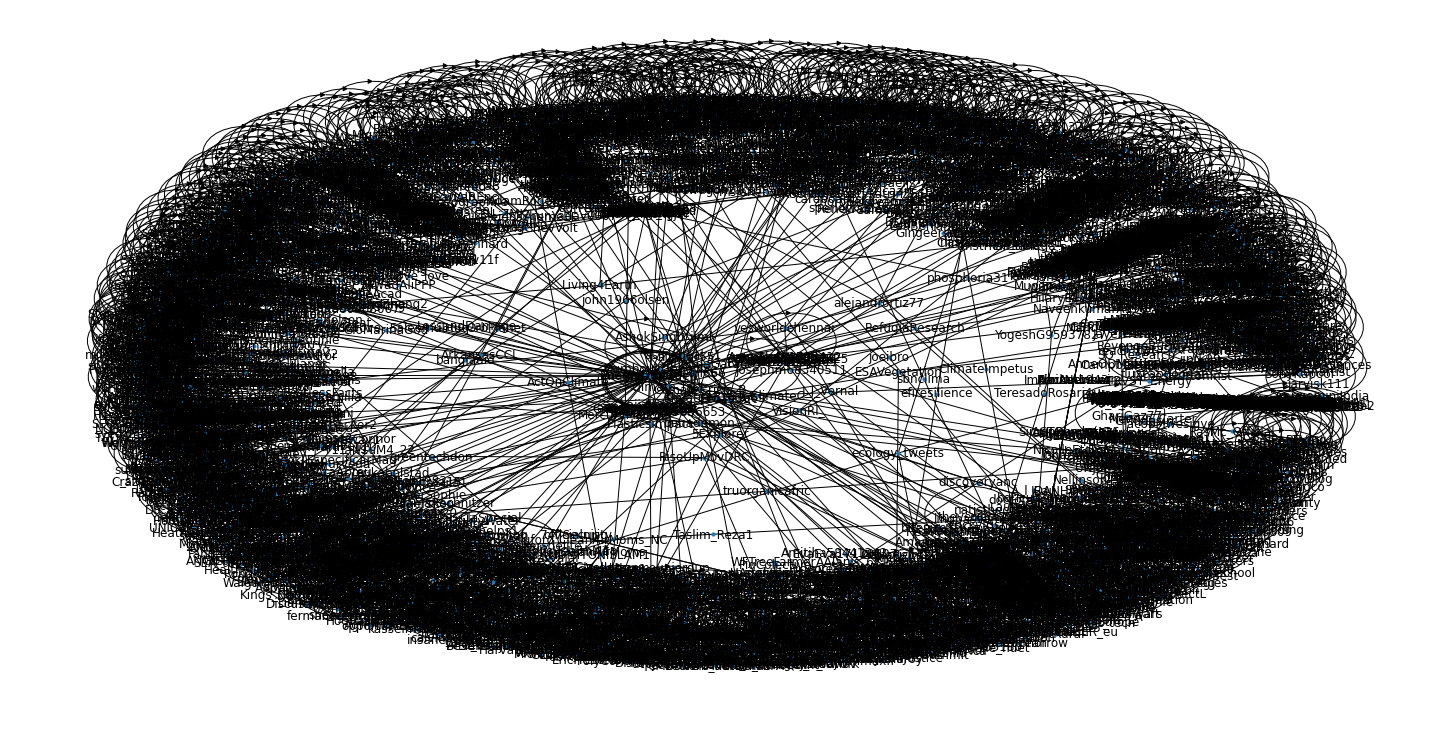

In [34]:
# using networkx to display the network graph 
!pip install 'networkx<2.7'
!pip install 'scipy>=1.8'

import networkx as nx
connectionDataFrame['nodes'] = connectionDataFrame[['User_A', 'User_B']].apply(tuple, axis=1)

network_graph = nx.DiGraph()  
network_graph.add_edges_from(connectionDataFrame['nodes'])
plt.figure(figsize = (20, 10))

nx.draw(network_graph, with_labels = True, node_size = 10, font_size = 12)  



In [35]:
# calculation closeness, degree, betweenness

degree = nx.degree_centrality(network_graph)
betweenness = nx.betweenness_centrality(network_graph)
closeness = nx.closeness_centrality(network_graph)

network_df = pd.DataFrame([degree, betweenness, closeness]).T
network_df.reset_index(inplace = True)
network_df.columns = ['User_A','Degree','Betweenness','Closeness']

x.merge(network_df,how = 'inner',left_on='User_A',right_on = 'User_A').head()



,Tweet,Retweets,Favorites,Friends,Descriptions,Followers,User_A,Created At,Degree,Betweenness,Closeness
0,"RT @emfarrelly: But, better economic managers ...",1,0,633,"Science matters, save the southern oceans, act...",400,deuademon,2023-02-07 05:28:30,0.000493,0.0,0.0
1,RT @JJKALE2: @Peter_Fitz I am a Pacific Island...,17,0,633,"Science matters, save the southern oceans, act...",400,deuademon,2023-02-06 22:51:22,0.000493,0.0,0.0
2,RT @margbootysnachr: wow.. last night it snowe...,1,0,763,Despair is the greatest of all sins. God will ...,874,nastrondscourge,2023-02-07 05:27:28,0.000246,0.0,0.0
3,RT @Radiant_Panel: Excited to kick off our edu...,2,0,2291,Working globally in concert with government an...,2835,IAPMO,2023-02-07 05:26:46,0.000246,0.0,0.0
4,Comedian pulls prank during Edmonton public he...,0,0,100,I'm focused on #Enegry #Policy and the latest ...,35,FassbenderENG,2023-02-07 05:26:33,0.000493,0.0,0.0


In [36]:
network_df.head()

,User_A,Degree,Betweenness,Closeness
0,deuademon,0.000493,0.0,0.000000
1,emfarrelly,0.000985,0.0,0.000493
2,nastrondscourge,0.000246,0.0,0.000000
3,margbootysnachr,0.000739,0.0,0.000246
4,IAPMO,0.000246,0.0,0.000000


In [37]:
connectionDataFrame.head()

,User_A,User_B,Interaction,nodes
0,deuademon,emfarrelly,Retweet,"(deuademon, emfarrelly)"
1,nastrondscourge,margbootysnachr,Retweet,"(nastrondscourge, margbootysnachr)"
2,IAPMO,Radiant_Panel,Retweet,"(IAPMO, Radiant_Panel)"
3,FassbenderENG,FassbenderENG,Tweet,"(FassbenderENG, FassbenderENG)"
4,melissa_cronin,WakoJoel,Retweet,"(melissa_cronin, WakoJoel)"


In [38]:
result_A1 = connectionDataFrame[connectionDataFrame["Interaction"] == "Retweet"].groupby("User_A").size().reset_index(name="Count_Retweet_sent")
result_A2 = connectionDataFrame[connectionDataFrame["Interaction"] == "Tweet"].groupby("User_A").size().reset_index(name="Count_Tweet_A")
result_A = result_A1.merge(result_A2, on = 'User_A',how='outer')
result_A

,User_A,Count_Retweet_sent,Count_Tweet_A
0,00HarshitMishra,1.0,NaN
1,03BenP,1.0,NaN
2,088Satya,1.0,NaN
3,0_BENTLEY_,1.0,NaN
4,0xGamer030,1.0,NaN
...,...,...,...
3838,xavguzm,NaN,1.0
3839,yaxl_to,NaN,1.0
3840,ysk2115,NaN,1.0
3841,zoebellock,NaN,1.0


In [39]:
'''result_B1 = connectionDataFrame[connectionDataFrame["Interaction"] == "Retweet"].groupby("User_B").size().reset_index(name="Count_Retweet_received")
result_B2 = connectionDataFrame[connectionDataFrame["Interaction"] == "Tweet"].groupby("User_B").size().reset_index(name="Count_Tweet_B")
result_B = result_B1.merge(result_B2, on = 'User_B',how='outer')
result_B'''

'result_B1 = connectionDataFrame[connectionDataFrame["Interaction"] == "Retweet"].groupby("User_B").size().reset_index(name="Count_Retweet_received")\nresult_B2 = connectionDataFrame[connectionDataFrame["Interaction"] == "Tweet"].groupby("User_B").size().reset_index(name="Count_Tweet_B")\nresult_B = result_B1.merge(result_B2, on = \'User_B\',how=\'outer\')\nresult_B'

In [40]:
x_resultA = x.merge(result_A,how = 'outer', on ='User_A').fillna(0)
x_resultA

,Tweet,Retweets,Favorites,Friends,Descriptions,Followers,User_A,Created At,Count_Retweet_sent,Count_Tweet_A
0,"RT @emfarrelly: But, better economic managers ...",1,0,633,"Science matters, save the southern oceans, act...",400,deuademon,2023-02-07 05:28:30,2.0,0.0
1,RT @JJKALE2: @Peter_Fitz I am a Pacific Island...,17,0,633,"Science matters, save the southern oceans, act...",400,deuademon,2023-02-06 22:51:22,2.0,0.0
2,RT @margbootysnachr: wow.. last night it snowe...,1,0,763,Despair is the greatest of all sins. God will ...,874,nastrondscourge,2023-02-07 05:27:28,1.0,0.0
3,RT @Radiant_Panel: Excited to kick off our edu...,2,0,2291,Working globally in concert with government an...,2835,IAPMO,2023-02-07 05:26:46,1.0,0.0
4,Comedian pulls prank during Edmonton public he...,0,0,100,I'm focused on #Enegry #Policy and the latest ...,35,FassbenderENG,2023-02-07 05:26:33,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
4995,RT @AUYouthProgram: The Stubborn Optimist: Mee...,9,0,1990,Paying it forward to young women and girls! Fo...,2782,cedric_mimbe,2023-02-06 06:49:58,1.0,0.0
4996,#Kenya is struggling to meet #SDG's Zero hunge...,0,4,177,I am passionate agribusiness consultant and CE...,175,RonaldNgeno14,2023-02-06 06:49:57,0.0,1.0
4997,Calling for applications from academics and sc...,2,6,1933,Now: Legal Adviser @ICRC_nd \n\nPrev: @CCGNLUD...,1031,gunjanchawla08,2023-02-06 06:49:25,0.0,1.0
4998,RT @ipfconline1: Chaos Researchers Can Now Pre...,8,0,1520,"I am here for the Dance, still learning all th...",623,Addaboubou,2023-02-06 06:49:21,1.0,0.0


In [41]:
final_df = x_resultA[['User_A','Retweets', 'Favorites', 'Friends','Followers','Count_Retweet_sent','Count_Tweet_A']]
final_df

,User_A,Retweets,Favorites,Friends,Followers,Count_Retweet_sent,Count_Tweet_A
0,deuademon,1,0,633,400,2.0,0.0
1,deuademon,17,0,633,400,2.0,0.0
2,nastrondscourge,1,0,763,874,1.0,0.0
3,IAPMO,2,0,2291,2835,1.0,0.0
4,FassbenderENG,0,0,100,35,0.0,4.0
...,...,...,...,...,...,...,...
4995,cedric_mimbe,9,0,1990,2782,1.0,0.0
4996,RonaldNgeno14,0,4,177,175,0.0,1.0
4997,gunjanchawla08,2,6,1933,1031,0.0,1.0
4998,Addaboubou,8,0,1520,623,1.0,0.0


In [42]:
x_resultA.columns

Index(['Tweet', 'Retweets', 'Favorites', 'Friends', 'Descriptions',
       'Followers', 'User_A', 'Created At', 'Count_Retweet_sent',
       'Count_Tweet_A'],
      dtype='object')

In [43]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler


columns_to_normalize = ['Retweets', 'Favorites', 'Friends','Followers','Count_Retweet_sent','Count_Tweet_A']

# Apply the MinMaxScaler to the selected columns
scaler = MinMaxScaler()
final_df[columns_to_normalize] = scaler.fit_transform(final_df[columns_to_normalize])
final_df = final_df.drop_duplicates(subset = 'User_A')
final_df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,User_A,Retweets,Favorites,Friends,Followers,Count_Retweet_sent,Count_Tweet_A
0,deuademon,0.000056,0.000000,0.003084,0.000098,0.032787,0.000000
2,nastrondscourge,0.000056,0.000000,0.003717,0.000213,0.016393,0.000000
3,IAPMO,0.000112,0.000000,0.011160,0.000691,0.016393,0.000000
4,FassbenderENG,0.000000,0.000000,0.000487,0.000009,0.000000,0.072727
8,melissa_cronin,0.000281,0.000000,0.011326,0.001270,0.016393,0.000000
...,...,...,...,...,...,...,...
4995,cedric_mimbe,0.000506,0.000000,0.009694,0.000678,0.016393,0.000000
4996,RonaldNgeno14,0.000000,0.008016,0.000862,0.000043,0.000000,0.018182
4997,gunjanchawla08,0.000112,0.012024,0.009416,0.000251,0.000000,0.018182
4998,Addaboubou,0.000450,0.000000,0.007404,0.000152,0.016393,0.000000


In [44]:
var_coefficients

retweetssent_diff    1.945426
follower_diff        1.413503
mentionssent_diff    1.195971
listed_diff          0.839095
dtype: float64

In [45]:
# calculation of scores based on coefficients in part I 
final_df["Score"] = 1.945426*final_df["Count_Retweet_sent"]+1.413503*final_df["Followers"]+1.195971*final_df["Favorites"]+0.839095*final_df["Count_Tweet_A"]
final_df.sort_values('Score',ascending=False).head(20)

newdf = final_df.drop_duplicates(subset = 'User_A').sort_values('Score',ascending=False).head(20)
newdf

<ipython-input-45-6901ed416785>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Score"] = 1.945426*final_df["Count_Retweet_sent"]+1.413503*final_df["Followers"]+1.195971*final_df["Favorites"]+0.839095*final_df["Count_Tweet_A"]


,User_A,Retweets,Favorites,Friends,Followers,Count_Retweet_sent,Count_Tweet_A,Score
182,imagine_garden,0.000056,0.000000,0.006805,0.001791,1.000000,0.018182,1.963214
3371,FRANCE24,0.002192,0.000000,0.002207,1.000000,0.016393,0.000000,1.445395
685,angryman113,0.000225,0.000000,0.002699,0.000059,0.639344,0.000000,1.243880
2354,Sgtnewsnetwork,0.018265,1.000000,0.000857,0.004504,0.000000,0.018182,1.217594
646,angrywoman514,0.000225,0.000000,0.000424,0.000003,0.606557,0.036364,1.210530
767,angryman2046,0.000225,0.000000,0.007911,0.000079,0.573770,0.072727,1.177364
991,501Awani,0.000000,0.000000,0.001734,0.725661,0.000000,0.018182,1.040980
724,angryman1972,0.000225,0.000000,0.005802,0.000205,0.393443,0.272727,0.994547
806,ThatAngryarmy,0.000225,0.002004,0.010882,0.000458,0.344262,0.363636,0.977907
378,climate_fact,0.000056,0.000000,0.000000,0.000636,0.459016,0.000000,0.893882
